In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('../data/NY_Airbnb/cleaned_airbnb_data.csv')

`Data Preparation`: Ensure the dataset is cleaned and pre-processed as necessary (e.g., handling missing values, categorizing data) before visualization.

In [133]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,length_of_stay_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Medium,Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Medium,Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Medium,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low,Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Low,Low


In [134]:
df.isna().sum(axis=0)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
price_category                        0
length_of_stay_category               0
dtype: int64

In [135]:
df = df[df['last_review'] != 'NaT']

1

Plot: Create a bar plot to show the distribution of listings across different neighbourhood_group.

Details: Label each bar with the count of listings, use distinct colors for each neighborhood group, and add titles and axis labels.

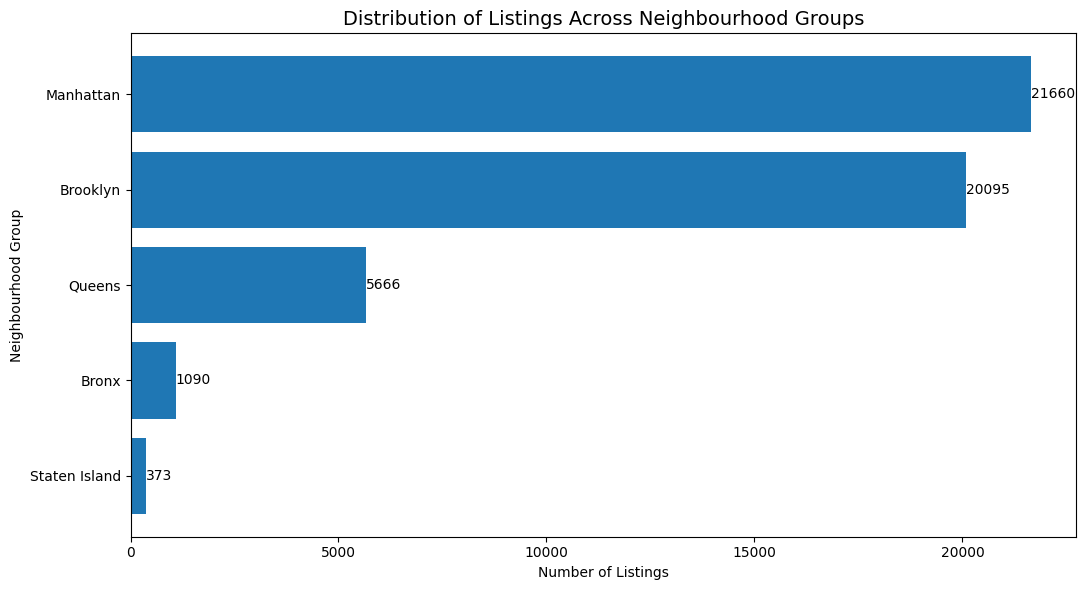

In [82]:
listing_counts = df['neighbourhood_group'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(11,6))
bars = plt.barh(listing_counts.index, listing_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(bar.get_width()), ha='left', va='center')

plt.title('Distribution of Listings Across Neighbourhood Groups', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()

2

Plot: Generate a box plot to display the distribution of price within each neighbourhood_group.

Details: Use different colors for the box plots, highlight outliers, and add appropriate titles and axis labels.

In [175]:
neighbourhood_groups = df['neighbourhood_group'].unique()
prices_by_group = [df[df['neighbourhood_group'] == group]['price'].values for group in neighbourhood_groups]

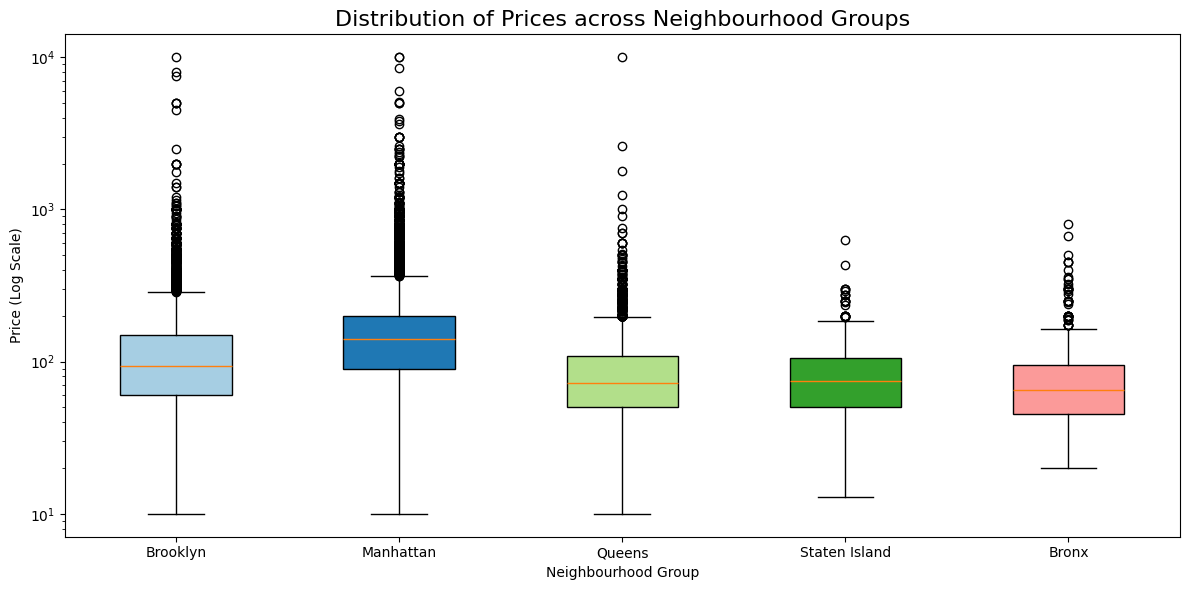

In [176]:
plt.figure(figsize=(12, 6))
box = plt.boxplot(prices_by_group, patch_artist=True, notch=False, vert=True, tick_labels=neighbourhood_groups)
colors = plt.cm.Paired.colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Distribution of Prices across Neighbourhood Groups', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=10)
plt.ylabel('Price (Log Scale)', fontsize=10)
plt.yscale('log')

plt.tight_layout()
plt.show()

3

Plot: Create a grouped bar plot to show the average availability_365 for each room_type across the neighborhoods.

Details: Include error bars to indicate the standard deviation, use different colors for room types, and add titles and axis labels.

In [94]:
grouped = df.groupby(['neighbourhood_group', 'room_type']).agg(
    mean_availability=('availability_365', 'mean'),
    std_availability=('availability_365', 'std')
).reset_index()

# Step 2: Pivot the DataFrame to get room types as columns
pivot_df = grouped.pivot(index='neighbourhood_group', columns='room_type', values=['mean_availability', 'std_availability'])

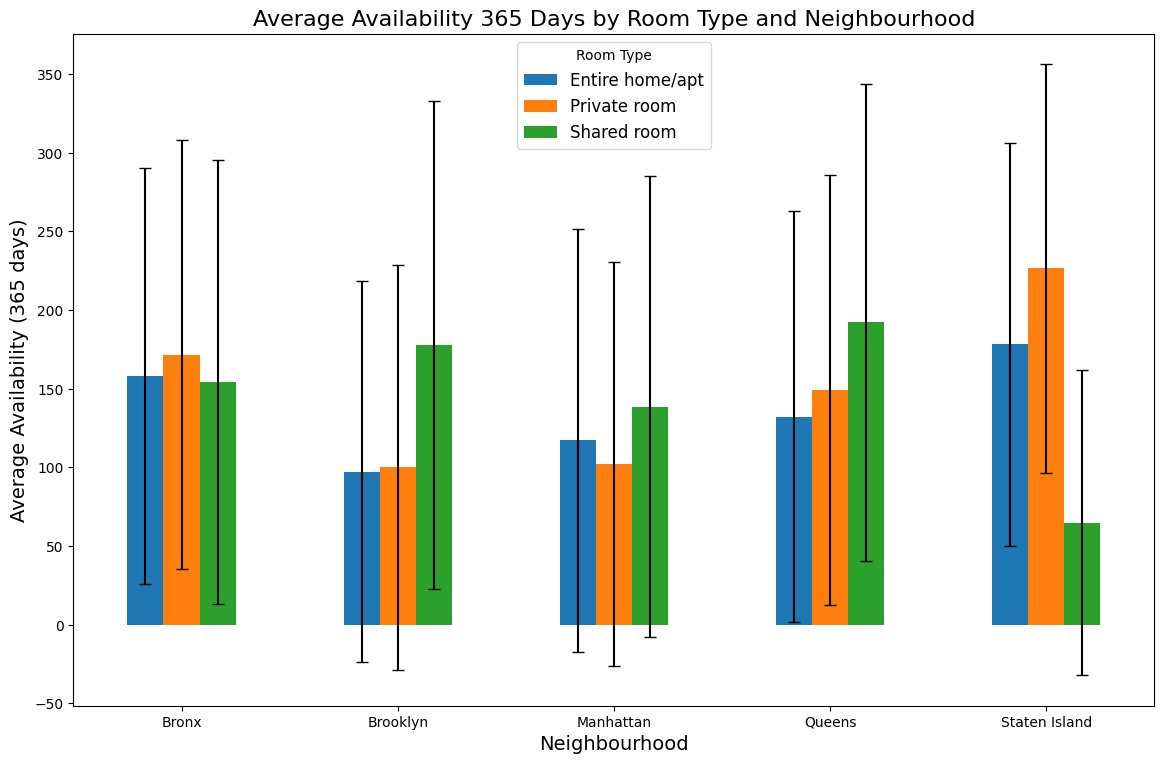

In [95]:
pivot_df['mean_availability'].plot(kind='bar', yerr=pivot_df['std_availability'], capsize=4, figsize=(12, 8), error_kw=dict(ecolor='black', lw=1.5))

plt.title('Average Availability 365 Days by Room Type and Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Availability (365 days)', fontsize=14)
plt.legend(title='Room Type', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout(pad=2)
plt.show()

4

Plot: Develop a scatter plot with price on the x-axis and number_of_reviews on the y-axis.

Details: Differentiate points by room_type using color or marker style, add a regression line to identify trends, and include a legend, titles, and axis labels.

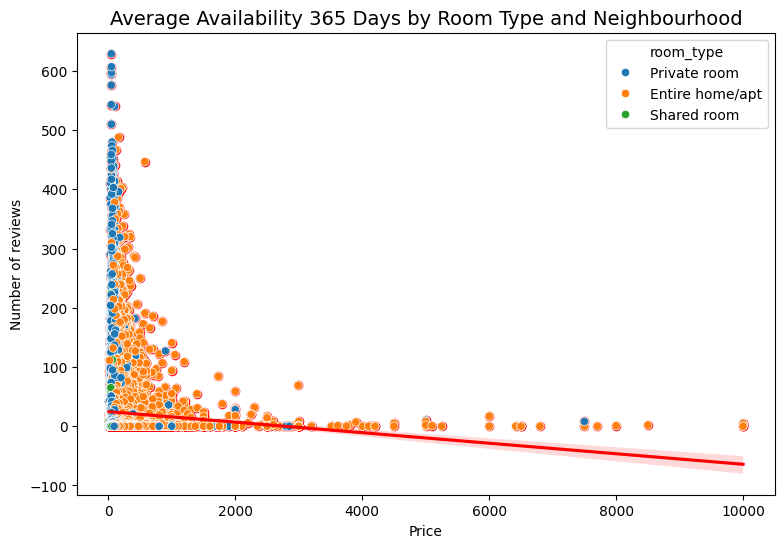

In [117]:
plt.figure(figsize=(9,6))
sns.regplot(data=df, x='price', y='number_of_reviews', color='red')
sns.scatterplot(data=df, x='price', y='number_of_reviews', hue='room_type', sizes=0.5)
plt.title('Average Availability 365 Days by Room Type and Neighbourhood', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

5

Plot: Create a line plot to show the trend of number_of_reviews over time (last_review) for each neighbourhood_group.

Details: Use different colors for each neighborhood group, smooth the data with a rolling average, and add titles, axis labels, and a legend.

In [143]:
df['last_review'] = pd.to_datetime(df['last_review'])

df['year_month'] = df['last_review'].dt.to_period('M')
monthly_grouped = df.groupby(['year_month', 'neighbourhood_group']).agg({'number_of_reviews': 'sum'}).reset_index()

monthly_grouped['year_month'] = monthly_grouped['year_month'].dt.to_timestamp()

monthly_grouped['rolling_reviews'] = monthly_grouped.groupby('neighbourhood_group')['number_of_reviews'].transform(lambda x: x.rolling(window=2, min_periods=1).mean())

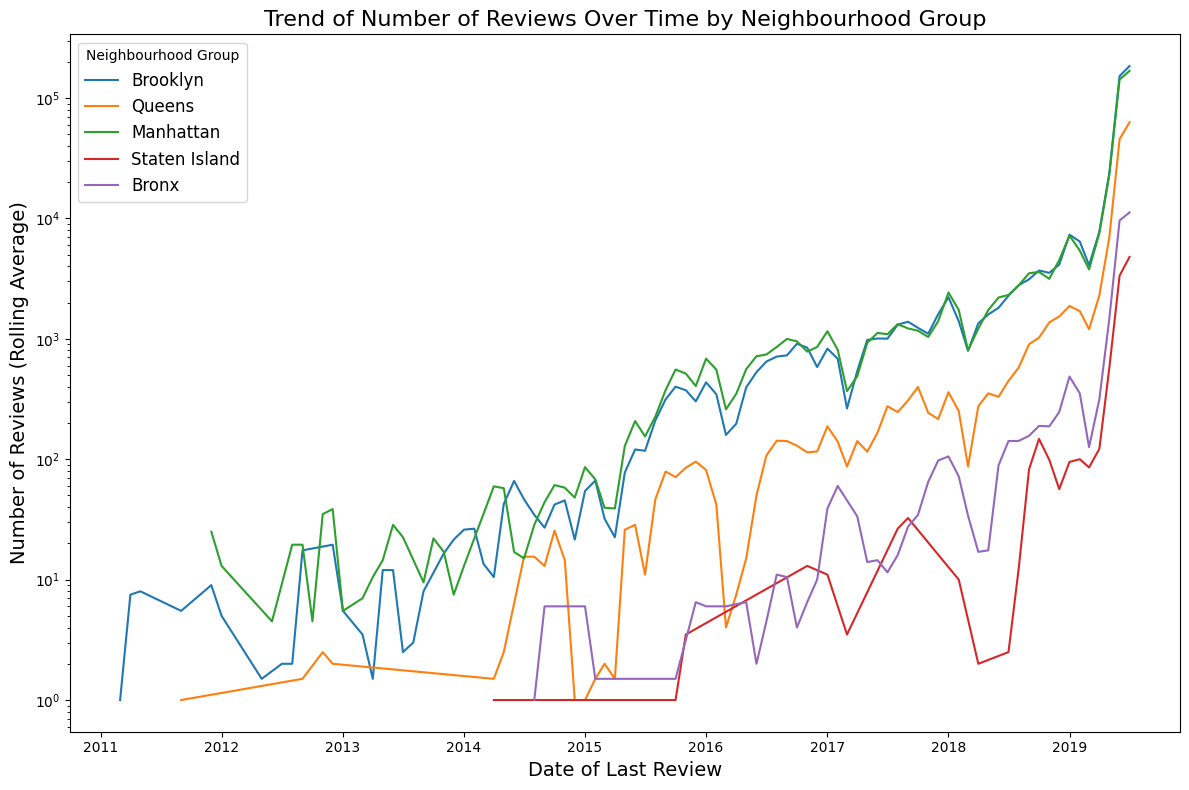

In [148]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=monthly_grouped, x='year_month', y='rolling_reviews', hue='neighbourhood_group')

plt.title('Trend of Number of Reviews Over Time by Neighbourhood Group', fontsize=16)
plt.xlabel('Date of Last Review', fontsize=14)
plt.ylabel('Number of Reviews (Rolling Average)', fontsize=14)
plt.yscale('log')
plt.legend(title='Neighbourhood Group', fontsize=12)

plt.tight_layout()
plt.show()

6

Plot: Generate a heatmap to visualize the relationship between price and availability_365 across different neighborhoods.

Details: Use a color gradient to represent the intensity of the relationship, label the axes, and include a color bar for reference.

In [167]:
corr_df = df.groupby('neighbourhood_group').apply(lambda x: x[['price', 'availability_365']].corr().iloc[0, 1]).reset_index()
corr_df.columns = ['neighbourhood_group', 'correlation']

C:\Users\t-bva\AppData\Local\Temp\ipykernel_16104\2194316068.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_df = df.groupby('neighbourhood_group').apply(lambda x: x[['price', 'availability_365']].corr().iloc[0, 1]).reset_index()


In [174]:
corr_df

,neighbourhood_group,correlation
0,Bronx,0.101771
1,Brooklyn,0.060371
2,Manhattan,0.136774
3,Queens,0.020913
4,Staten Island,-0.027548


7

Plot: Create a stacked bar plot to display the number_of_reviews for each room_type across the neighbourhood_group.

Details: Stack the bars by room type, use different colors for each room type, and add titles, axis labels, and a legend.

In [ ]:
pivot_df = df.pivot_table(index='neighbourhood_group', columns='room_type', values='number_of_reviews', aggfunc='sum', fill_value=0)

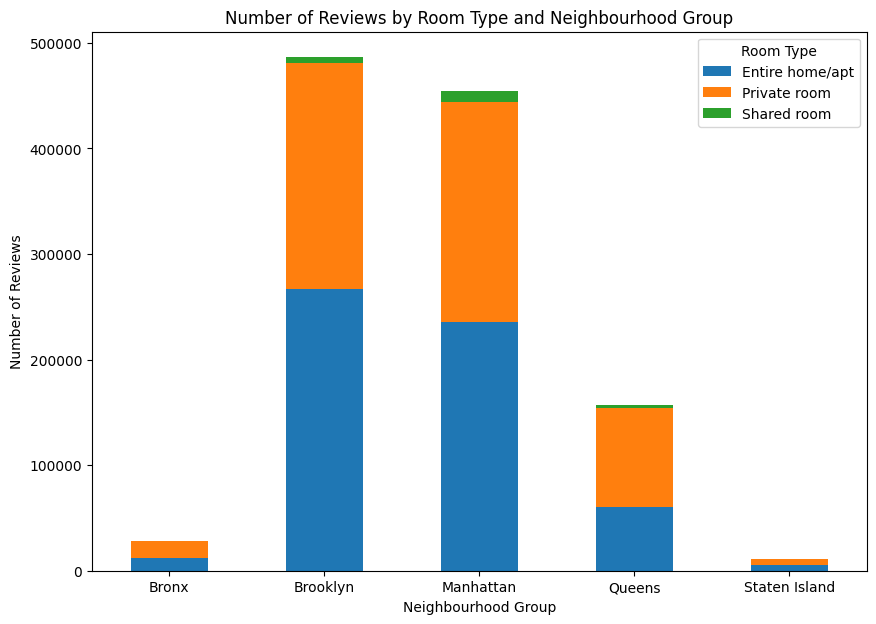

In [159]:
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Number of Reviews by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=0)
plt.ylabel('Number of Reviews')
plt.legend(title='Room Type')

plt.show()